# Data Analysis Notebook

This notebook is designed for the purpose of analyzing data obtained from the Hydra cluster. It provides a set of tools and techniques for performing data analysis tasks and extracting insights from the data.


In [1]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("../AdditionalStructure/NewTypes.jl")
include("../AdditionalStructure/BitStringOps.jl")
include("../AdditionalStructure/Measurements.jl")
include("../AdditionalStructure/MICModels.jl")
include("../AdditionalStructure/ModelRuns.jl")
include("../AdditionalStructure/HelperTools.jl")
include("../AdditionalStructure/Iterators.jl");

exp_index = 1
dir_extension = ""
file_prefix = ""
filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
data = h5read(filename, "/")

for key in keys(data)
    println("$key: $(data[key])")
end


n_t: 10
exp_index: 1
p_f_max: 0.5
n_subdiv: 11
TEE: [2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 0.0 4.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 4.0 3.0 3.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 2.0 1.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 2.0;;; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 3.0 4.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 9.0 6.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 4.0 4.0 6.0 9.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 6.0 10.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 4.0 6.0 21.0; 2.0 2.0 2.0 2.0 2.0 2.0 3.0 6.0 3.0 13.0 13.0; 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 4.0 13.0 14.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 0.0 11.0 29.0; 2.0 2.0 2.0 2.0 3.0 2.0 3.0 3.0 2.0 5.0 19.0;;; 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.

In [2]:
all_data = []
for exp_index in 1:400
    filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
    if ispath(filename)
        data = h5read(filename, "/")
        # print(data["L"],",")
        push!(all_data, data)
    end
end
print("data sets read: ",length(all_data))

data sets read: 314

In [3]:
Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 15
        push!(Observables_t_p, data["TEE"][:, :, :])
    end
end
Observables_t_p_15  = cat(dims= 4, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 18
        push!(Observables_t_p, data["TEE"][:, :, :])
    end
end
Observables_t_p_18  = cat(dims= 4, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 21
        push!(Observables_t_p, data["TEE"][:, :, :])
    end
end
Observables_t_p_21  = cat(dims= 4, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 24
        push!(Observables_t_p, data["TEE"][:, :, :])
    end
end
Observables_t_p_24  = cat(dims= 4, Observables_t_p...);

In [4]:
Means_15 = mean(Observables_t_p_15, dims=4) 
Vars_15 = var(Observables_t_p_15, dims=4) 
Error_in_means_15 = std(Observables_t_p_15, dims=4) ./ sqrt(size(Observables_t_p_15, 4)) 
Medians_15 = median(Observables_t_p_15, dims=4)

Means_18 = mean(Observables_t_p_18, dims=4) 
Vars_18 = var(Observables_t_p_18, dims=4) 
Error_in_means_18 = std(Observables_t_p_18, dims=4) ./ sqrt(size(Observables_t_p_18, 4)) 
Medians_18 = median(Observables_t_p_18, dims=4);

Means_21 = mean(Observables_t_p_21, dims=4)
Vars_21 = var(Observables_t_p_21, dims=4)
Error_in_means_21 = std(Observables_t_p_21, dims=4) ./ sqrt(size(Observables_t_p_21, 4))
Medians_21 = median(Observables_t_p_21, dims=4)

Means_24 = mean(Observables_t_p_24, dims=4)
Vars_24 = var(Observables_t_p_24, dims=4)
Error_in_means_24 = std(Observables_t_p_24, dims=4) ./ sqrt(size(Observables_t_p_24, 4))
Medians_24 = median(Observables_t_p_24, dims=4);

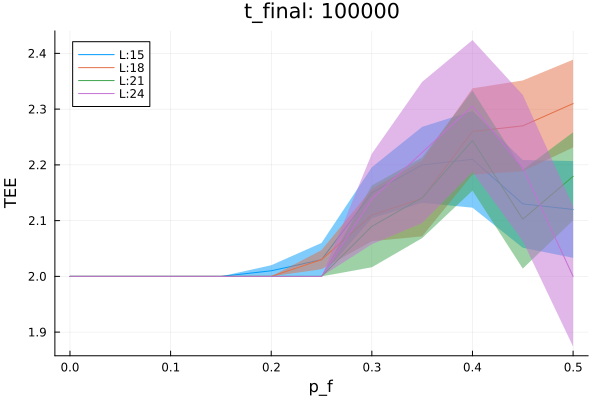

In [5]:
t_cut = 0

plot(model_data["p_f_arr"], Means_15[end-t_cut, :, 1], ribbon=Error_in_means_15[end-t_cut, :, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
plot!(model_data["p_f_arr"], Means_18[end-t_cut, :, 1], ribbon=Error_in_means_18[end-t_cut, :, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], Means_21[end-t_cut, :, 1], ribbon=Error_in_means_21[end-t_cut, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], Means_24[end-t_cut, :, 1], ribbon=Error_in_means_24[end-t_cut, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


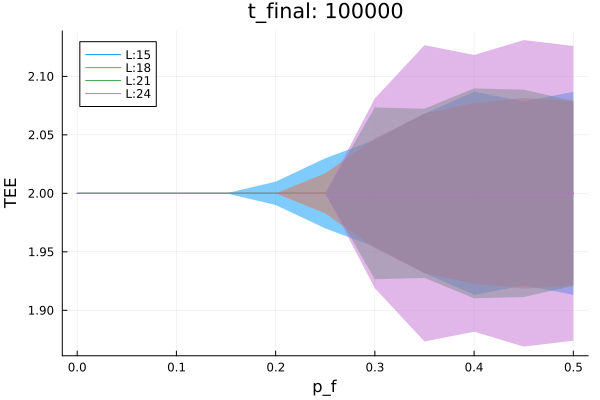

In [6]:
plot(model_data["p_f_arr"], Medians_15[end-t_cut, :, 1], ribbon=Error_in_means_15[end-t_cut, :, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
plot!(model_data["p_f_arr"], Medians_18[end-t_cut, :, 1], ribbon=Error_in_means_18[end-t_cut, :, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], Medians_21[end-t_cut, :, 1], ribbon=Error_in_means_21[end-t_cut, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], Medians_24[end-t_cut, :, 1], ribbon=Error_in_means_24[end-t_cut, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)

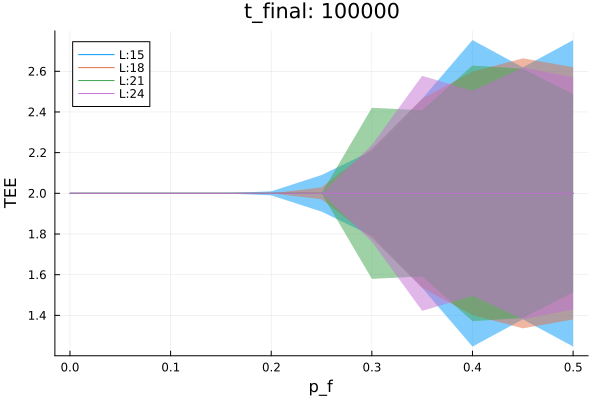

In [7]:
plot(model_data["p_f_arr"], Medians_15[end-t_cut, :, 1], ribbon=Vars_15[end-t_cut, :, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
plot!(model_data["p_f_arr"], Medians_18[end-t_cut, :, 1], ribbon=Vars_18[end-t_cut, :, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], Medians_21[end-t_cut, :, 1], ribbon=Vars_21[end-t_cut, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], Medians_24[end-t_cut, :, 1], ribbon=Vars_24[end-t_cut, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)

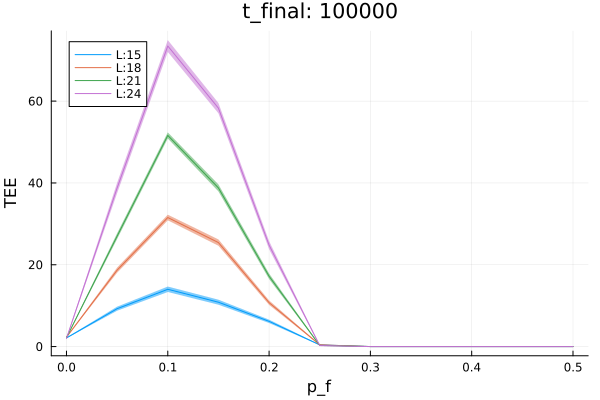

In [8]:
t_cut = 0
p_b_cut = 11

plot(model_data["p_f_arr"], Means_15[end-t_cut, p_b_cut, :], ribbon=Error_in_means_15[end-t_cut, p_b_cut, :], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
plot!(model_data["p_f_arr"], Means_18[end-t_cut, p_b_cut, :], ribbon=Error_in_means_18[end-t_cut, p_b_cut, :], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], Means_21[end-t_cut, p_b_cut, :], ribbon=Error_in_means_21[end-t_cut, p_b_cut, :], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], Means_24[end-t_cut, p_b_cut, :], ribbon=Error_in_means_24[end-t_cut, p_b_cut, :], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)

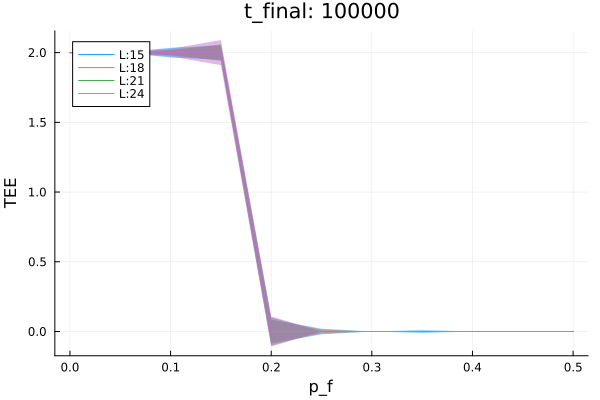

In [9]:
plot(model_data["p_f_arr"], Medians_15[end-t_cut, 1, :], ribbon=Error_in_means_15[end-t_cut, 1, :], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
plot!(model_data["p_f_arr"], Medians_18[end-t_cut, 1, :], ribbon=Error_in_means_18[end-t_cut, 1, :], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], Medians_21[end-t_cut, 1, :], ribbon=Error_in_means_21[end-t_cut, 1, :], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], Medians_24[end-t_cut, 1, :], ribbon=Error_in_means_24[end-t_cut, 1, :], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)

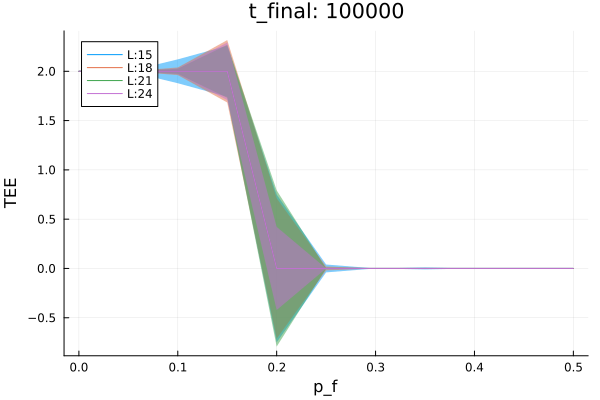

In [10]:
plot(model_data["p_f_arr"], Medians_15[end-t_cut, 1, :], ribbon=Vars_15[end-t_cut, 1, :], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
plot!(model_data["p_f_arr"], Medians_18[end-t_cut, 1, :], ribbon=Vars_18[end-t_cut, 1, :], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], Medians_21[end-t_cut, 1, :], ribbon=Vars_21[end-t_cut, 1, :], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
plot!(model_data["p_f_arr"], Medians_24[end-t_cut, 1, :], ribbon=Vars_24[end-t_cut, 1, :], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)

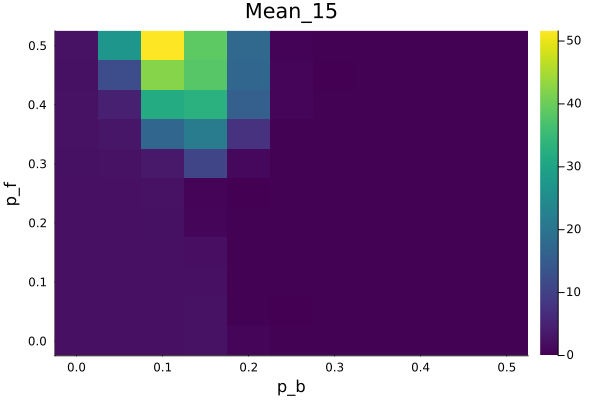

In [11]:
t_cut = 0

heatmap(model_data["p_b_arr"], model_data["p_f_arr"], Means_21[end-t_cut, :, :], xlabel="p_b", ylabel="p_f", title="Mean_15", color=:viridis)


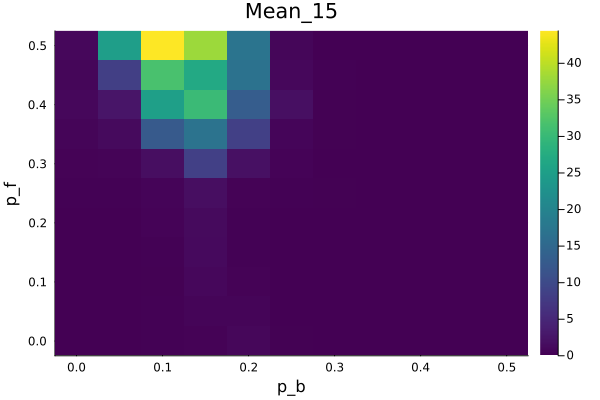

In [12]:
t_cut = 0

heatmap(model_data["p_b_arr"], model_data["p_f_arr"], Vars_15[end-t_cut, :, :], xlabel="p_b", ylabel="p_f", title="Mean_15", color=:viridis)

## EE of the Cut

In [13]:
Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 15
        push!(Observables_t_p, data["EE_cut"][:, :, :, :])
    end
end
Observables_t_p_15  = cat(dims= 5, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 18
        push!(Observables_t_p, data["EE_cut"][:, :, :, :])
    end
end
Observables_t_p_18  = cat(dims= 5, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 21
        push!(Observables_t_p, data["EE_cut"][:, :, :, :])
    end
end
Observables_t_p_21  = cat(dims= 5, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 24
        push!(Observables_t_p, data["EE_cut"][:, :, :, :])
    end
end
Observables_t_p_24  = cat(dims= 5, Observables_t_p...);


In [14]:
Means_15 = mean(Observables_t_p_15, dims=5) 
Vars_15 = var(Observables_t_p_15, dims=5) 
Error_in_means_15 = std(Observables_t_p_15, dims=5) ./ sqrt(size(Observables_t_p_15, 5)) 
Medians_15 = median(Observables_t_p_15, dims=5)

Means_18 = mean(Observables_t_p_18, dims=5) 
Vars_18 = var(Observables_t_p_18, dims=5) 
Error_in_means_18 = std(Observables_t_p_18, dims=5) ./ sqrt(size(Observables_t_p_18, 5)) 
Medians_18 = median(Observables_t_p_18, dims=5);

Means_21 = mean(Observables_t_p_21, dims=5)
Vars_21 = var(Observables_t_p_21, dims=5)
Error_in_means_21 = std(Observables_t_p_21, dims=5) ./ sqrt(size(Observables_t_p_21, 5))
Medians_21 = median(Observables_t_p_21, dims=5)

Means_24 = mean(Observables_t_p_24, dims=5)
Vars_24 = var(Observables_t_p_24, dims=5)
Error_in_means_24 = std(Observables_t_p_24, dims=5) ./ sqrt(size(Observables_t_p_24, 5))
Medians_24 = median(Observables_t_p_24, dims=5);

In [32]:
t_cut = 0
p_b_ind = 1
p_b = model_data["p_b_arr"][p_b_ind]

for p_f_ind in 1:length(model_data["p_f_arr"])
    p_f = model_data["p_f_arr"][p_f_ind]
    plot(model_data["subdiv_array"], Means_21[end - t_cut, p_f_ind, p_b_ind, :], ribbon= Error_in_means_21[end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="Means_21", label="p_b=$(p_b), p_f=$(p_f)")
end


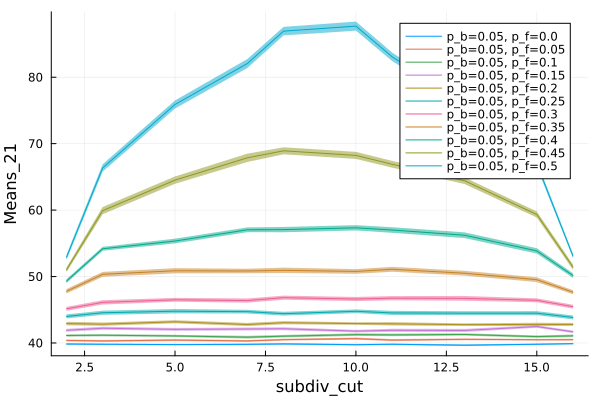

In [41]:
t_cut = 0
p_b_ind = 2
p_b = model_data["p_b_arr"][p_b_ind]


p_f_ind = 1
p_f = model_data["p_f_arr"][p_f_ind]
plot(model_data["subdiv_array"], Means_21[end - t_cut, p_f_ind, p_b_ind, :], ribbon= Error_in_means_21[end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="Means_21", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 2
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], Means_21[end - t_cut, p_f_ind, p_b_ind, :], ribbon= Error_in_means_21[end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="Means_21", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 3
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], Means_21[end - t_cut, p_f_ind, p_b_ind, :], ribbon= Error_in_means_21[end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="Means_21", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 4
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], Means_21[end - t_cut, p_f_ind, p_b_ind, :], ribbon= Error_in_means_21[end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="Means_21", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 5
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], Means_21[end - t_cut, p_f_ind, p_b_ind, :], ribbon= Error_in_means_21[end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="Means_21", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 6
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], Means_21[end - t_cut, p_f_ind, p_b_ind, :], ribbon= Error_in_means_21[end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="Means_21", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 7
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], Means_21[end - t_cut, p_f_ind, p_b_ind, :], ribbon= Error_in_means_21[end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="Means_21", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 8
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], Means_21[end - t_cut, p_f_ind, p_b_ind, :], ribbon= Error_in_means_21[end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="Means_21", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 9
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], Means_21[end - t_cut, p_f_ind, p_b_ind, :], ribbon= Error_in_means_21[end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="Means_21", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 10
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], Means_21[end - t_cut, p_f_ind, p_b_ind, :], ribbon= Error_in_means_21[end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="Means_21", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 11
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], Means_21[end - t_cut, p_f_ind, p_b_ind, :], ribbon= Error_in_means_21[end - t_cut, p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="Means_21", label="p_b=$(p_b), p_f=$(p_f)")
